In [17]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torchvision

In [18]:
train_dir = "../data/seg_train/seg_train"
val_dir = "../data/seg_test/seg_test"
test_dir = "../data/seg_pred/seg_pred"

In [19]:
train_transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.RandomHorizontalFlip(),  # Flip images horizontally at random
    transforms.RandomRotation(10),  # Randomly rotate images by 10 degrees
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),  # Randomly changes image brightness, contrast, and saturation
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                         std=[0.5, 0.5, 0.5])
])

In [20]:
test_transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),  # Scales pixel values to [0, 1]
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Optional, adjust as needed
])

In [21]:
train_dataset = datasets.ImageFolder(root=train_dir, transform=train_transform)
val_dataset = datasets.ImageFolder(root=val_dir, transform=test_transform)

In [22]:
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

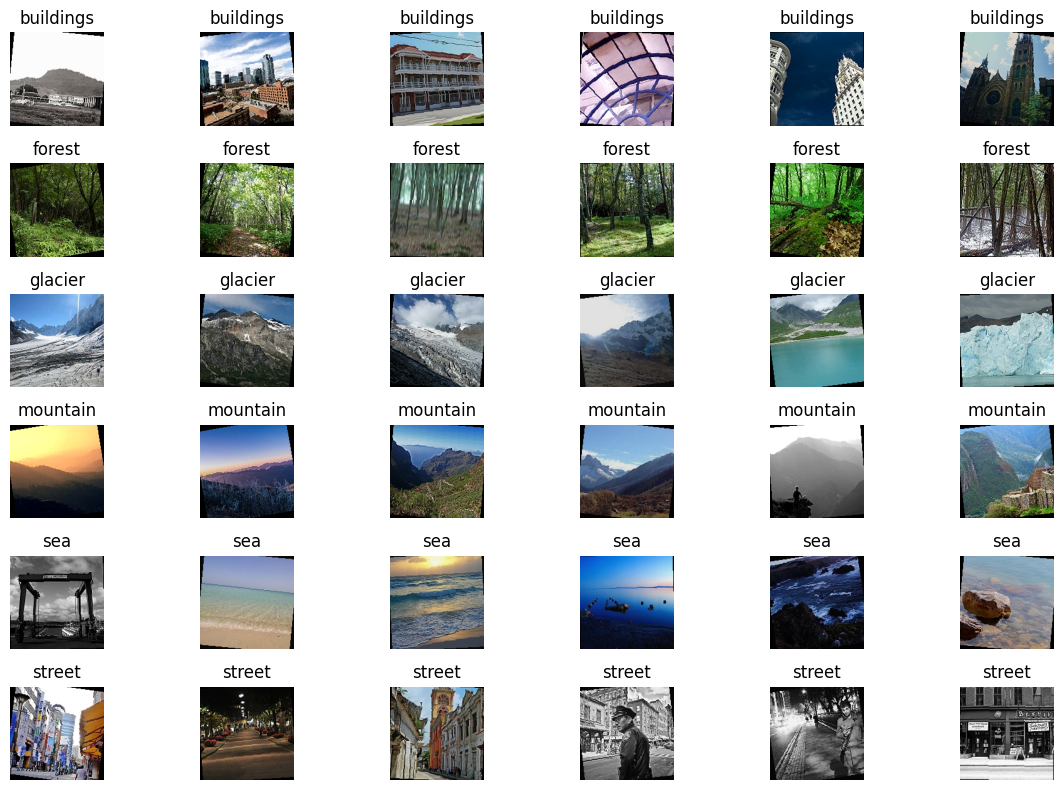

In [23]:
def show_images_from_each_class(dataset, num_classes=3, images_per_class=3):
    # Handle both Subset and ImageFolder
    base_dataset = dataset.dataset if hasattr(dataset, 'dataset') else dataset
    class_indices = {v: k for k, v in base_dataset.class_to_idx.items()}
    
    shown = {i: 0 for i in range(num_classes)}
    
    plt.figure(figsize=(12, 8))
    i = 0
    for img, label in dataset:
        if shown[label] < images_per_class:
            i += 1
            plt.subplot(num_classes, images_per_class, i)
            img = img.permute(1, 2, 0).numpy()
            img = img * 0.5 + 0.5  # Undo normalization
            plt.imshow(img)
            plt.title(class_indices[label])
            plt.axis("off")
            shown[label] += 1
        if i >= num_classes * images_per_class:
            break
    plt.tight_layout()
    plt.show()

show_images_from_each_class(train_loader.dataset, num_classes=6, images_per_class=6)